In [22]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-adapt-usage)

We'll integrate the function from {numref}`Demo %s <demo-adapt-motive>`.

In [23]:
from scipy.integrate import quad
f = lambda x: (x + 1) ** 2 * cos((2 * x + 1) / (x - 4.3))
I, errest = quad(f, 0, 4, epsabs=1e-12, epsrel=1e-12)
print("integral:", I)    # 'exact' value

integral: -2.8255333734374504


We perform the integration and show the nodes selected underneath the curve.

number of nodes: 69


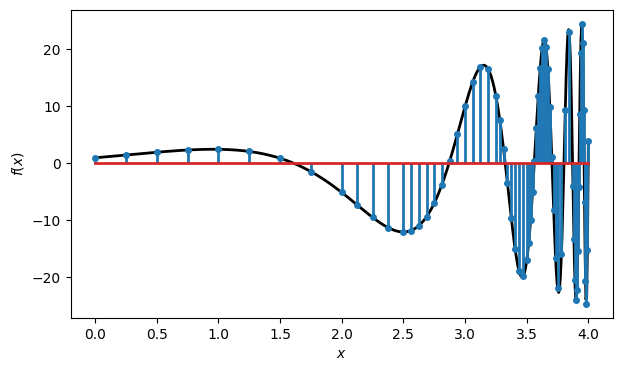

In [24]:
Q, t = FNC.intadapt(f, 0, 4, 0.001)
print("number of nodes:", t.size)

x = linspace(0, 4, 600)
plot(x, f(x), "k")
stem(t, f(t))
xlabel("$x$"); ylabel("$f(x)$");

The error turns out to be a bit more than we requested. It's only an estimate, not a guarantee.

In [25]:
print("error:", I - Q)

error: -0.02200281303763152


Let's see how the number of integrand evaluations and the error vary with the requested tolerance.

In [26]:
tol = 10.0 ** arange(-4, -11, -1)
err = zeros(len(tol))
num = zeros(len(tol), dtype=int)
results = PrettyTable(["tolerance", "error", "number of f-evals"])
for k in range(len(tol)):
    Q, t = FNC.intadapt(f, 0, 4, tol[k])
    err[k] = abs(I - Q)
    num[k] = len(t)
    results.add_row([tol[k], err[k], num[k]])
print(results)

+-----------+------------------------+-------------------+
| tolerance |         error          | number of f-evals |
+-----------+------------------------+-------------------+
|   0.0001  | 0.00041946881777921163 |        113        |
|   1e-05   | 4.789766253399108e-05  |        181        |
|   1e-06   | 6.314383844685523e-06  |        297        |
|   1e-07   | 6.639249816586812e-07  |        489        |
|   1e-08   |  7.18080657158282e-08  |        757        |
|   1e-09   | 1.265238136483049e-08  |        1193       |
|   1e-10   | 8.441305432427271e-10  |        2009       |
+-----------+------------------------+-------------------+


As you can see, even though the errors are not smaller than the estimates, the two columns decrease in tandem. If we consider now the convergence not in $h$, which is poorly defined now, but in the number of nodes actually chosen, we come close to the fourth-order accuracy of the underlying Simpson scheme.

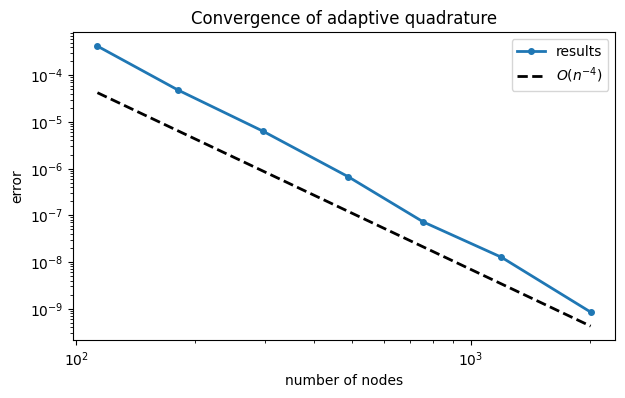

In [28]:
loglog(num, abs(err), "-o", label="results")
order4 = 0.5 * err[-1] * (num / num[-1]) ** (-4)
loglog(num, order4, "k--", label="$O(n^{-4})$")
xlabel("number of nodes"), ylabel("error")
legend()
title("Convergence of adaptive quadrature");